### Orthogonal Polynomial Encoding:
If levels, `k = 4` then The coefficients taken on by polynomial are the `linear, quadratic, and cubic` trends in the categorical variable. Here categorical variables are assumed to be represented as equally spaced orderd variable. That is why this encoding is performed only for ordered equally space variables. In general, the polynomial contrast produces polynomials of order k-1.
https://www.statsmodels.org/dev/contrasts.html#orthogonal-polynomial-coding

In [1]:
import pandas as pd
import numpy as np

from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
car_data = pd.read_csv('datasets/auto-mpg.csv', na_values='?')

car_data.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
117,29.0,4,68.0,49.0,1867,19.5,73,2,fiat 128
202,17.5,6,258.0,95.0,3193,17.8,76,1,amc pacer d/l
335,35.0,4,122.0,88.0,2500,15.1,80,2,triumph tr7 coupe
77,22.0,4,121.0,76.0,2511,18.0,72,2,volkswagen 411 (sw)
323,27.9,4,156.0,105.0,2800,14.4,80,1,dodge colt
196,24.5,4,98.0,60.0,2164,22.1,76,1,chevrolet woody
18,27.0,4,97.0,88.0,2130,14.5,70,3,datsun pl510
386,25.0,6,181.0,110.0,2945,16.4,82,1,buick century limited
73,13.0,8,307.0,130.0,4098,14.0,72,1,chevrolet chevelle concours (sw)
24,21.0,6,199.0,90.0,2648,15.0,70,1,amc gremlin


In [3]:
car_data = car_data[['mpg', 'horsepower']]

car_data.dropna(inplace=True)

car_data.reset_index(inplace=True, drop=True)

car_data.sample(10)

,mpg,horsepower
57,25.0,80.0
69,13.0,190.0
54,27.0,60.0
217,25.5,96.0
110,18.0,90.0
299,34.2,70.0
338,30.0,84.0
103,12.0,167.0
346,34.7,63.0
45,22.0,72.0


In [4]:
car_data.corr()

,mpg,horsepower
mpg,1.000000,-0.778427
horsepower,-0.778427,1.000000


#### Visualize the correlations in a heatmap
Mpg and horsepower are closely correlated

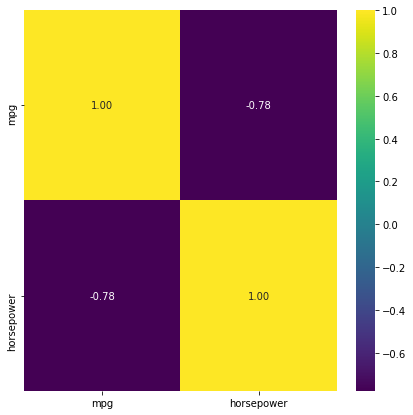

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))  

ax = sns.heatmap(car_data.corr(), 
                 annot=True, 
                 fmt='.2f', 
                 cmap='viridis')

plt.show()

### Creating an ordered categorical from `read`.

In [6]:
_, bin_edges = np.histogram(car_data['horsepower'], 3)

### Points of bins

In [7]:
bin_edges

array([ 46.        , 107.33333333, 168.66666667, 230.        ])

### Assigning numercical values to the bins
https://docs.scipy.org/doc/numpy/reference/generated/numpy.digitize.html

In [8]:
hp_cat = np.digitize(car_data['horsepower'], bin_edges, True)

In [9]:
hp_cat[:100]

array([2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 2, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 3, 3, 3,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2,
       3, 2, 2, 3, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2,
       2, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1])

In [10]:
hp_cat.shape

(392,)

### Adding the column to the dataframe

In [11]:
car_data['hp_cat'] = hp_cat

car_data.sample(5)

,mpg,horsepower,hp_cat
336,25.8,92.0,1
183,26.0,79.0,1
188,14.5,152.0,2
257,20.8,85.0,1
270,23.8,85.0,1


In [12]:
car_data.drop(columns=['horsepower'], inplace=True)

### Grouping by  `hp_cat`  and evaluating the mean of each group

In [13]:
car_data_grouped = car_data.groupby('hp_cat')

car_data_grouped.head()

,mpg,hp_cat
0,18.0,2
1,15.0,2
2,18.0,2
3,16.0,2
4,17.0,2
5,15.0,3
6,14.0,3
7,14.0,3
8,14.0,3
9,15.0,3


In [14]:
car_data_grouped.mean()

,mpg
hp_cat,
0,26.000000
1,27.186275
2,17.289320
3,13.296875


In [15]:
car_data_grouped.mean().mean()

mpg    20.943117
dtype: float64

### Getting the unique values in the `hp_cat` column 

In [16]:
car_data.hp_cat.unique()

array([2, 3, 1, 0])

### Note:
<B> Here levels, `K = 4`. The coefficients taken on by polynomial coding for `k=4` levels are the `linear`, `quadratic`, and `cubic` trends in the categorical variable </B>

### Creating and fitting the model

In [17]:
mod = ols("mpg ~ C(hp_cat, Poly)",
          data=car_data)

result = mod.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     106.9
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           1.80e-50
Time:                        17:52:12   Log-Likelihood:                -1243.1
No. Observations:                 392   AIC:                             2494.
Df Residuals:                     388   BIC:                             2510.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    20.9431      1.070     19.577      0.000      18.840      23.046
C(hp_cat, Poly).Linear      -10.7345      2.838     -3.782      0.000     -16.315      -5.154
C(hp_cat, Poly).Quadratic    -2.5894      2.140     -1.210      0.227      -6.796       1.617
C(hp_cat, Poly).Cubic         3.7986      1.048      3.624      0.000       1.738       5.859
==============================================================================
Omnibus:                       15.471   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.178
Skew:                           0.480   Prob(JB):                     0.000307
Kurtosis:                       3.266   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### It can be observed that, `hp_cat` has a significant linear effect on the dependent variable `displacement` but not a significant quadratic or cubic effect.

In [18]:
print('Parameters: ', result.params)
print('\nR2 Score: ', result.rsquared)

Parameters:  Intercept                    20.943117
C(hp_cat, Poly).Linear      -10.734542
C(hp_cat, Poly).Quadratic    -2.589360
C(hp_cat, Poly).Cubic         3.798574
dtype: float64

R2 Score:  0.4526112147657164


### Importing `Poly` from `Patsy`

In [19]:
from patsy.contrasts import Poly

### Getting the unique values in the `read_cat` column and printing the values as a list

In [20]:
levels = [0, 1, 2, 3]

levels

[0, 1, 2, 3]

#### Making a contrast matrix

In [21]:
contrast_with_int = Poly().code_with_intercept(levels)
contrast_with_int

ContrastMatrix(array([[ 1.        , -0.67082039,  0.5       , -0.2236068 ],
                      [ 1.        , -0.2236068 , -0.5       ,  0.67082039],
                      [ 1.        ,  0.2236068 , -0.5       , -0.67082039],
                      [ 1.        ,  0.67082039,  0.5       ,  0.2236068 ]]),
               ['.Constant', '.Linear', '.Quadratic', '.Cubic'])

In [22]:
contrast_without_intercept = Poly().code_without_intercept(levels)
contrast_without_intercept

ContrastMatrix(array([[-0.67082039,  0.5       , -0.2236068 ],
                      [-0.2236068 , -0.5       ,  0.67082039],
                      [ 0.2236068 , -0.5       , -0.67082039],
                      [ 0.67082039,  0.5       ,  0.2236068 ]]),
               ['.Linear', '.Quadratic', '.Cubic'])

In [23]:
car_data_contrast = contrast_without_intercept.matrix[car_data.hp_cat - 0, :]
car_data_contrast[:10]

array([[ 0.2236068 , -0.5       , -0.67082039],
       [ 0.2236068 , -0.5       , -0.67082039],
       [ 0.2236068 , -0.5       , -0.67082039],
       [ 0.2236068 , -0.5       , -0.67082039],
       [ 0.2236068 , -0.5       , -0.67082039],
       [ 0.67082039,  0.5       ,  0.2236068 ],
       [ 0.67082039,  0.5       ,  0.2236068 ],
       [ 0.67082039,  0.5       ,  0.2236068 ],
       [ 0.67082039,  0.5       ,  0.2236068 ],
       [ 0.67082039,  0.5       ,  0.2236068 ]])

In [24]:
car_data_contrast_df = pd.DataFrame(car_data_contrast, 
                                    columns =['linear', 'quadratic', 'cubic'])

car_data_contrast_df.sample(10)

,linear,quadratic,cubic
123,0.670820,0.5,0.223607
320,-0.223607,-0.5,0.670820
304,0.223607,-0.5,-0.670820
132,0.223607,-0.5,-0.670820
384,-0.223607,-0.5,0.670820
186,0.223607,-0.5,-0.670820
372,-0.223607,-0.5,0.670820
387,-0.223607,-0.5,0.670820
224,-0.223607,-0.5,0.670820
75,0.223607,-0.5,-0.670820


In [25]:
car_data_enc = pd.concat([car_data, car_data_contrast_df], 
                          axis=1)

car_data_enc.sample(10)

,mpg,hp_cat,linear,quadratic,cubic
146,26.0,1,-0.223607,-0.5,0.670820
311,28.0,1,-0.223607,-0.5,0.670820
105,12.0,3,0.670820,0.5,0.223607
254,20.5,1,-0.223607,-0.5,0.670820
31,25.0,1,-0.223607,-0.5,0.670820
111,19.0,1,-0.223607,-0.5,0.670820
137,14.0,2,0.223607,-0.5,-0.670820
241,21.5,2,0.223607,-0.5,-0.670820
91,13.0,2,0.223607,-0.5,-0.670820
380,25.0,2,0.223607,-0.5,-0.670820


In [26]:
X = car_data_enc.drop(columns = ['mpg', 'hp_cat'], axis=1)

y = car_data_enc['mpg']

X.sample(10)

,linear,quadratic,cubic
106,-0.223607,-0.5,0.670820
263,0.223607,-0.5,-0.670820
5,0.670820,0.5,0.223607
296,0.223607,-0.5,-0.670820
233,-0.223607,-0.5,0.670820
230,0.223607,-0.5,-0.670820
271,-0.223607,-0.5,0.670820
151,-0.223607,-0.5,0.670820
46,-0.223607,-0.5,0.670820
105,0.670820,0.5,0.223607


In [27]:
y.head(10)

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
5    15.0
6    14.0
7    14.0
8    14.0
9    15.0
Name: mpg, dtype: float64

In [28]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X, y)

print("Training_score : " , linear_model.score(X, y))

Training_score :  0.4526112147657164


In [29]:
linear_model.coef_

array([-10.73454153,  -2.58935995,   3.79857355])

In [30]:
linear_model.intercept_

20.943117474538354